In [23]:
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable


In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

In [8]:
# sns.barplot(data=,x=,y=)

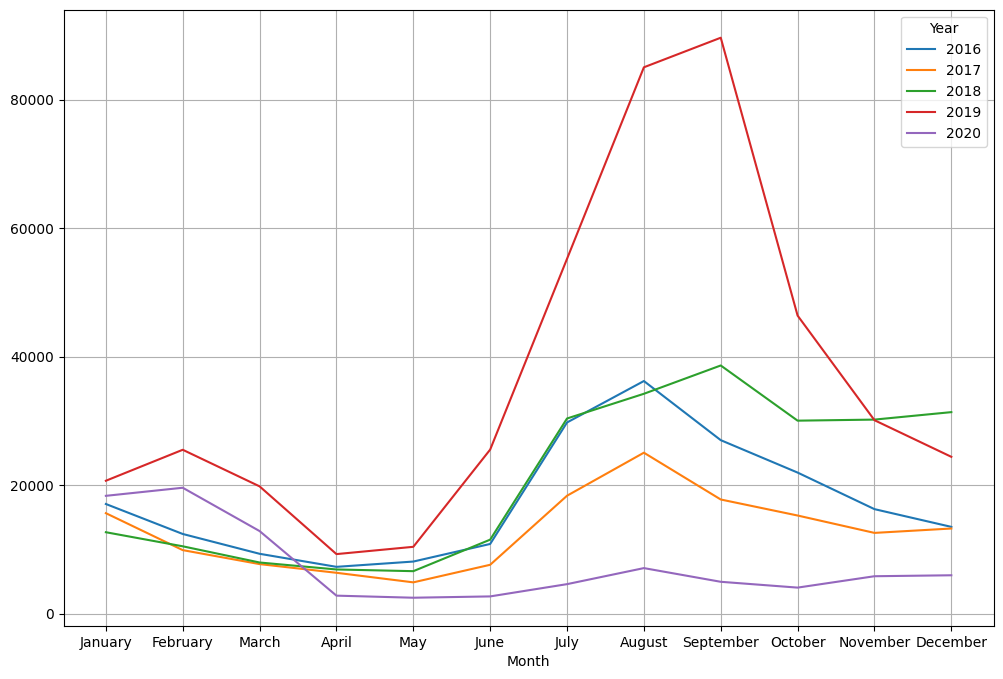

In [9]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h2>Insight </h2>
<p>September 2019 </p>

<h1> LINE PLOT WITH SEABORN </h1>

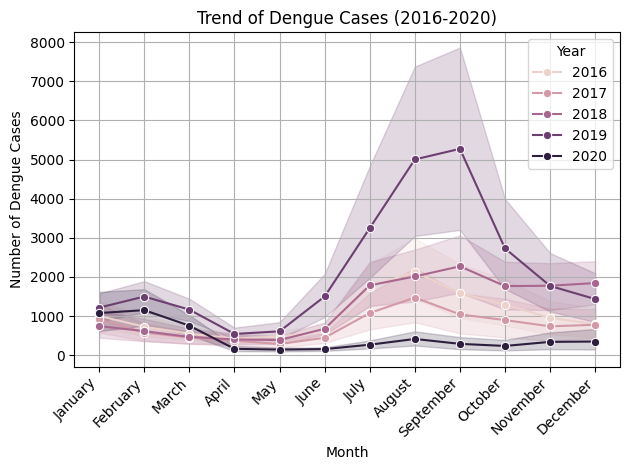

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
# plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

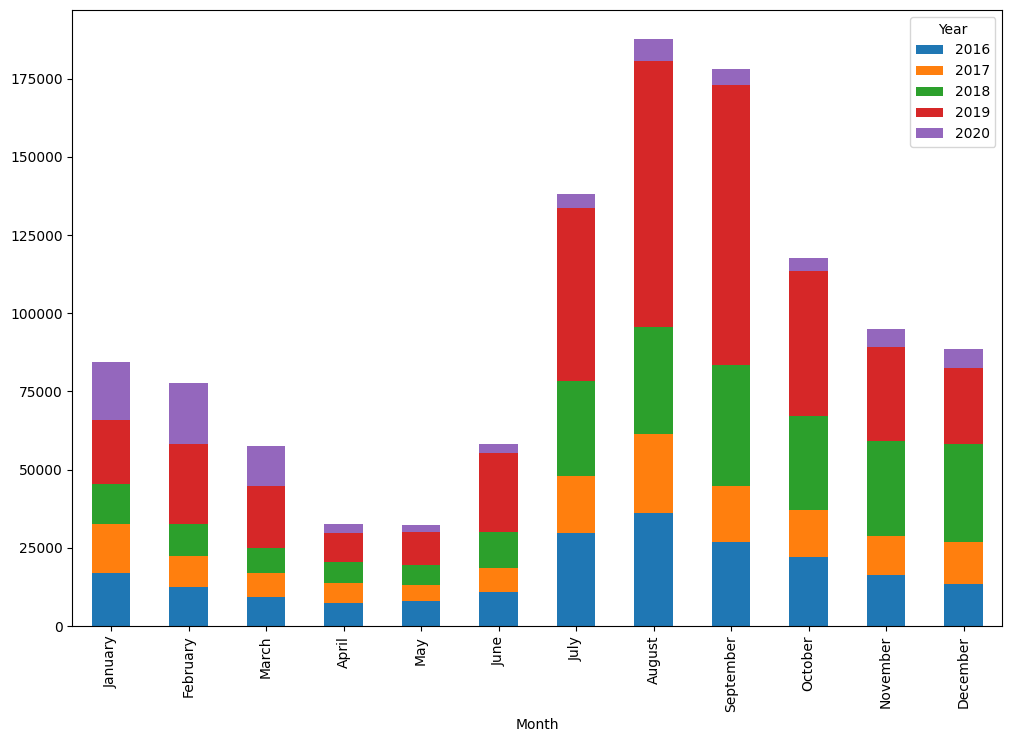

In [11]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h2>Insight </h2>
<p>July 2020</p>

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

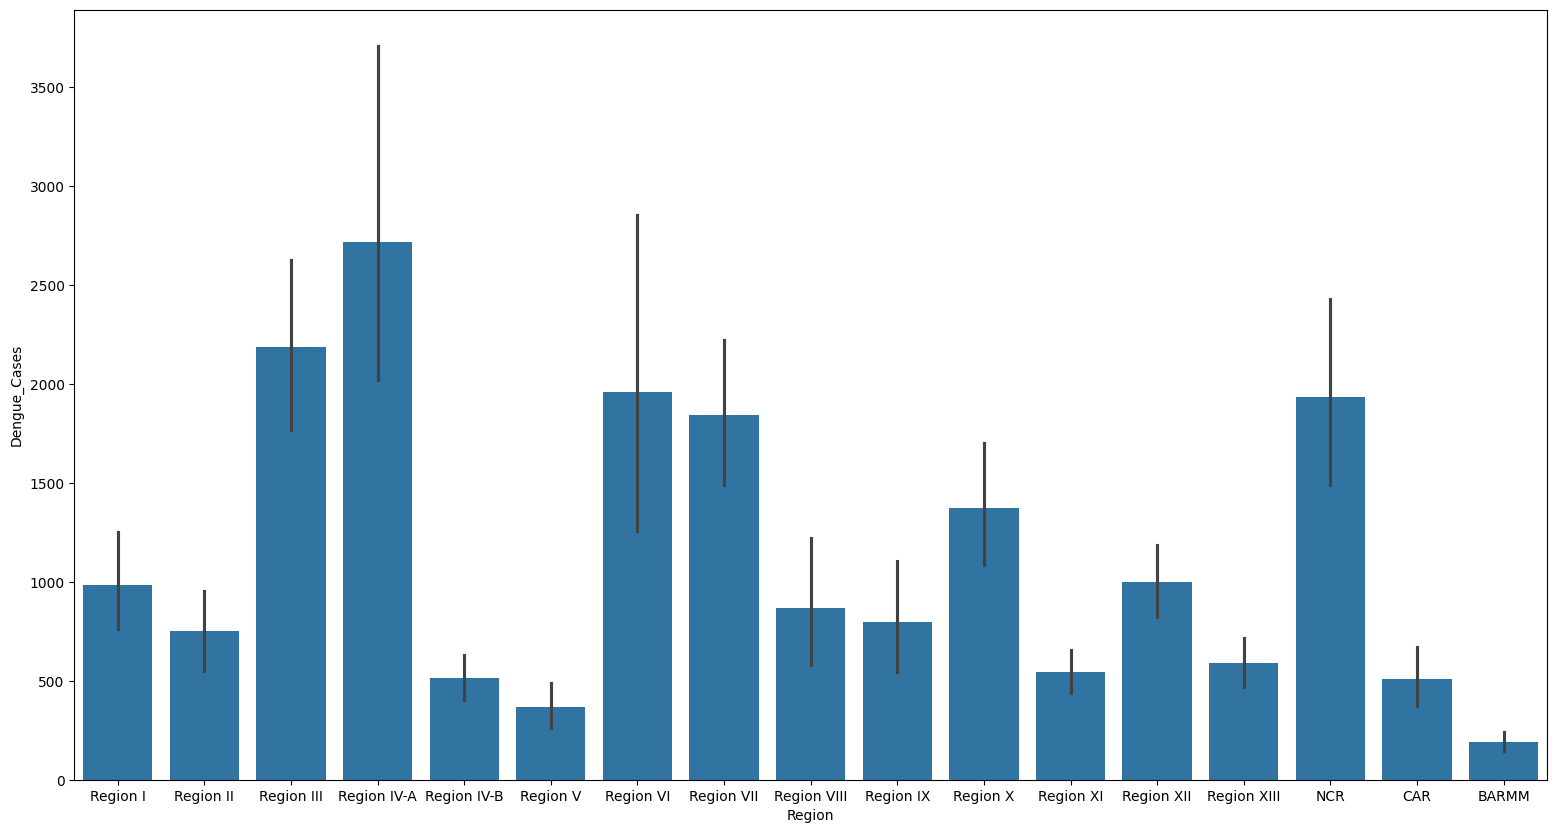

In [12]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [13]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [14]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


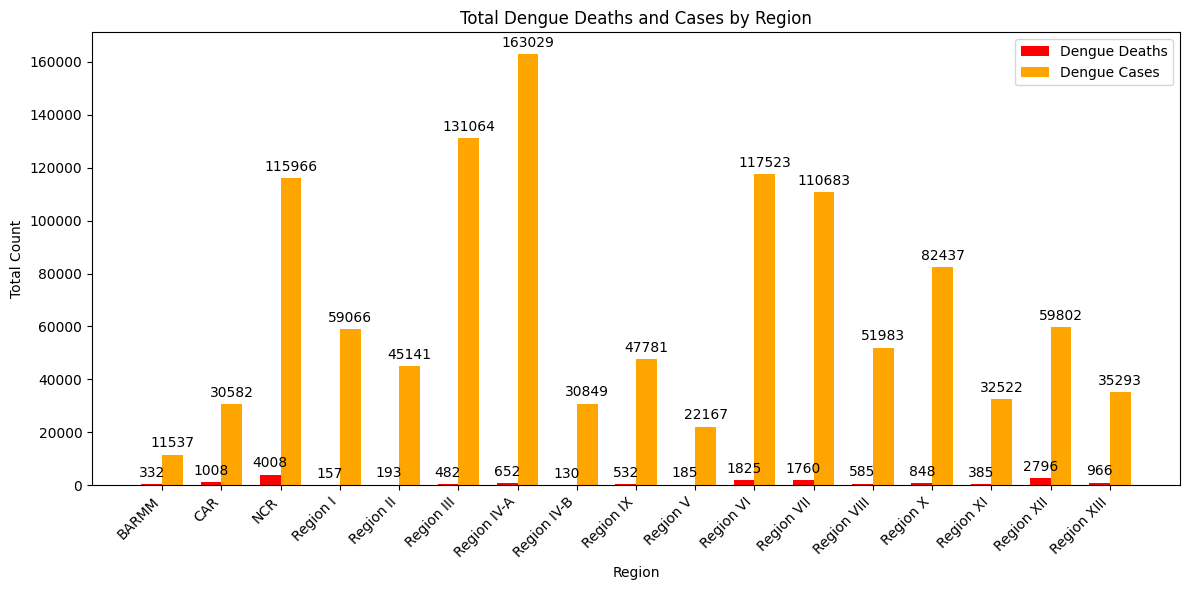

In [28]:

# Assuming Regional_Death is already created
regions = Regional_Death['Region']
deaths = Regional_Death['Dengue_Deaths']
cases = Regional_Death['Dengue_Cases']

# Set up bar positions
x = np.arange(len(regions))
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, deaths, width, label='Dengue Deaths', color='red')
bars2 = ax.bar(x + width/2, cases, width, label='Dengue Cases', color='orange')

# Add labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Total Count')
ax.set_title('Total Dengue Deaths and Cases by Region')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()

# Optional: Add value labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text slightly above bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [15]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [16]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


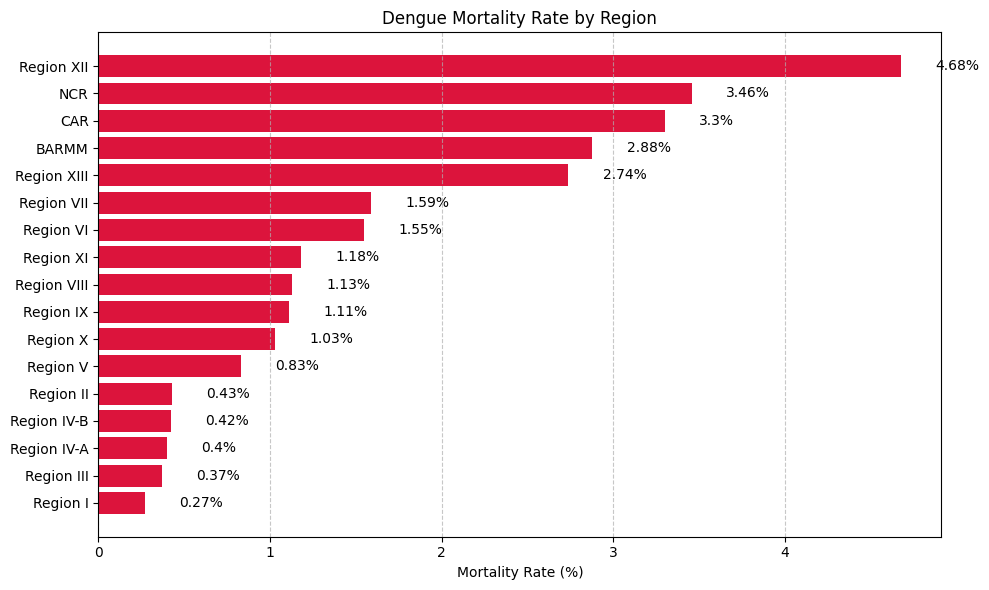

In [29]:

# Sort regions by mortality rate for better visual impact
Regional_Death_sorted = Regional_Death.sort_values(by='Mortality_Rate', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(Regional_Death_sorted['Region'], Regional_Death_sorted['Mortality_Rate'], color='crimson')
plt.xlabel('Mortality Rate (%)')
plt.title('Dengue Mortality Rate by Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: Add value labels
for index, value in enumerate(Regional_Death_sorted['Mortality_Rate']):
    plt.text(value + 0.2, index, f'{value}%', va='center')

plt.tight_layout()
plt.show()


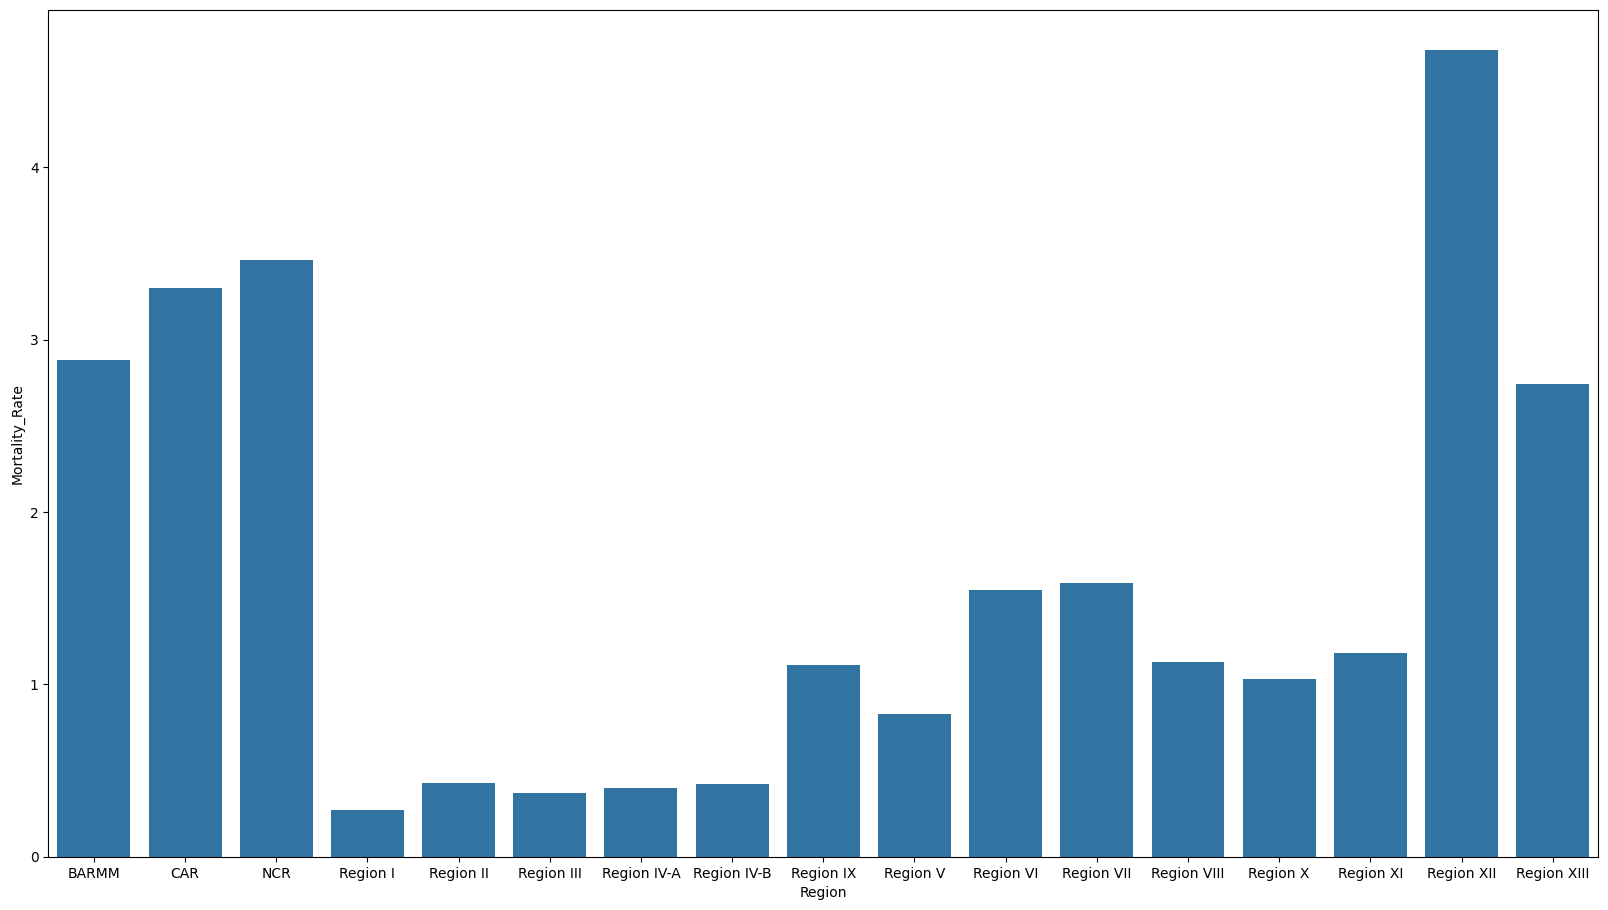

In [17]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

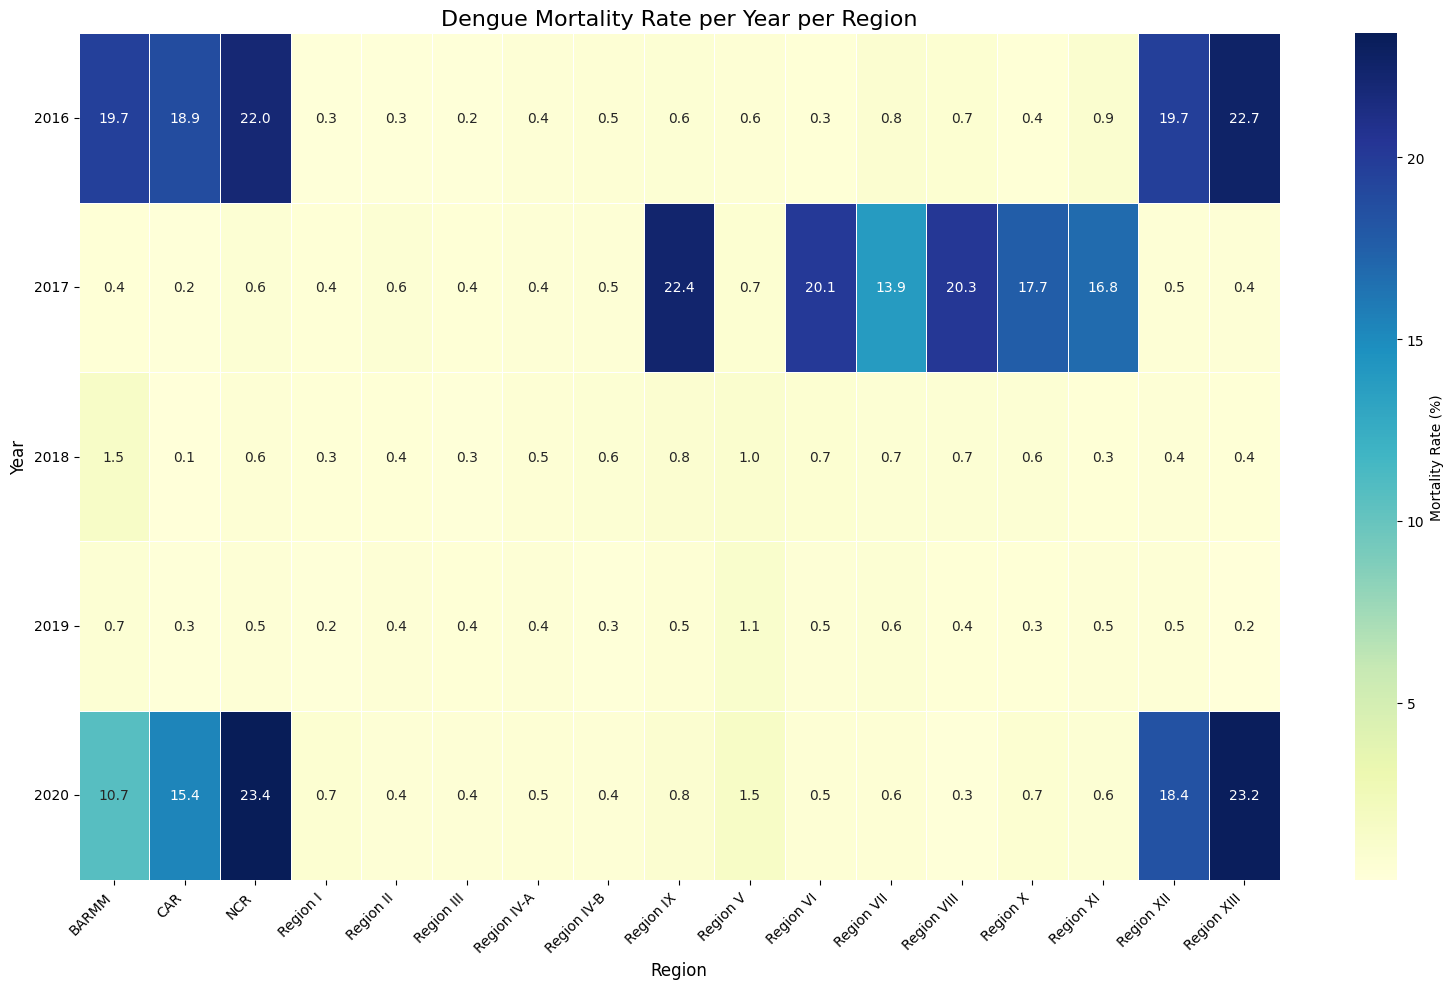

In [18]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVES </h1>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


Month             category
Year                 int64
Region              object
Dengue_Cases         int64
Dengue_Deaths        int64
Mortality_Rate     float64
dtype: object
Mean Squared Error: 1805441.73572055
Predicted number of dengue cases in 2025 : 1280.286494492415


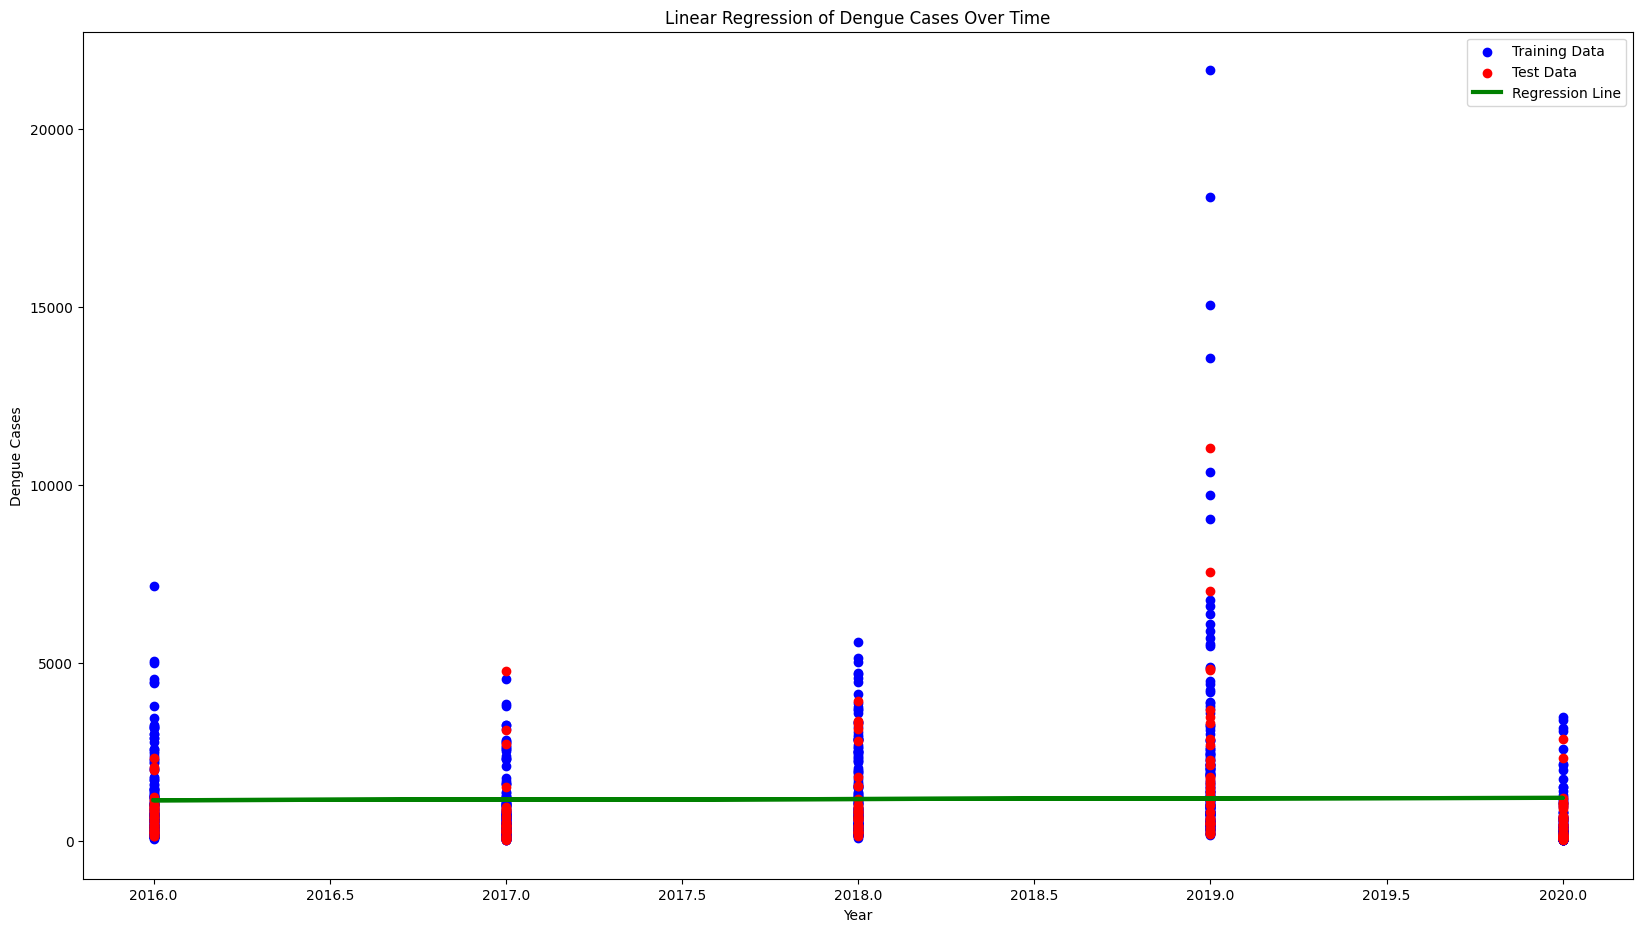

In [27]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()


In [54]:
dengue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           1020 non-null   category      
 1   Year            1020 non-null   datetime64[ns]
 2   Region          1020 non-null   object        
 3   Dengue_Cases    1020 non-null   int64         
 4   Dengue_Deaths   1020 non-null   int64         
 5   Mortality_Rate  1020 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.4+ KB


In [57]:
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')


In [58]:
# Filter for NCR region
dengue_NCR = dengue[dengue["Region"] == "NCR"]

# Group by Region (optional here since it's only NCR) and sum Dengue_Deaths
total_deaths_NCR = dengue_NCR["Dengue_Deaths"].sum()
print("Total Dengue Deaths in NCR:", total_deaths_NCR)

Total Dengue Deaths in NCR: 4008


In [59]:
# Group by Year within NCR and sum Dengue_Deaths
deaths_by_year_NCR = dengue_NCR.groupby("Year")["Dengue_Deaths"].sum().reset_index()
print(deaths_by_year_NCR)


        Year  Dengue_Deaths
0 2016-01-01           2987
1 2017-01-01            168
2 2018-01-01            180
3 2019-01-01            190
4 2020-01-01            483


In [60]:
dengue_NCR = dengue.groupby([{dengue[dengue["Region"]=="NCR"],["Dengue_Deaths"]}]).sum()

TypeError: unhashable type: 'DataFrame'

In [42]:
dengue_NCR = dengue[dengue["Region"]=="NCR"].groupby("Region")["Dengue_Cases"].sum()

In [43]:
dengue_NCR

Region
NCR    115966
Name: Dengue_Cases, dtype: int64

In [44]:
dengue["Region"]=="NCR"

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Region, Length: 1020, dtype: bool

In [45]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,January,2016-01-01,Region I,705,1,0.141844
1,February,2016-01-01,Region I,374,0,0.000000
2,March,2016-01-01,Region I,276,0,0.000000
3,April,2016-01-01,Region I,240,2,0.833333
4,May,2016-01-01,Region I,243,1,0.411523
...,...,...,...,...,...,...
1015,August,2020-01-01,BARMM,91,0,0.000000
1016,September,2020-01-01,BARMM,16,8,50.000000
1017,October,2020-01-01,BARMM,13,9,69.230769
1018,November,2020-01-01,BARMM,15,1,6.666667


In [46]:
dengue_NCR_2016 = dengue[(dengue["Region"]=="NCR") & (dengue["Year"]=="2016")]["Dengue_Cases"].sum()


In [47]:
dengue_NCR_2016

np.int64(13002)

In [48]:
dengue["Year"] == "2016"

0        True
1        True
2        True
3        True
4        True
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Year, Length: 1020, dtype: bool